## Import packages and Load Data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

def load_sentences(filename):
    sentences = []
    with open(filename, 'r', encoding='utf-8') as file:
        data = file.readlines()
        for d in data:
            if d.startswith('~'):
                d = d[1:].strip()
                tokens = d.split()
                sentences.append(tokens)
    return sentences

before_tokens = load_sentences('../mwo_sentences/before_fixes.txt')
after_tokens = load_sentences('../mwo_sentences/after_fixes.txt')

with open('../data/MaintIE/gold_release.json', 'r', encoding='utf-8') as file:
    gold_data = json.load(file)

with open('../data/MaintIE/silver_release.json', 'r', encoding='utf-8') as file:
    silver_data = json.load(file)

In [44]:
# Print number of tokens in the data
def synthetic_tokens_analysis(data, data_name):
    """ Analyse the number of tokens in the maintie data. """
    min_tokens = 1000 # Minimum number of tokens
    max_tokens = 0    # Maximum number of tokens
    sum_tokens = 0    # Sum of tokens

    for tokens in data:
        if len(tokens) > max_tokens:
            max_tokens = len(tokens)
        if len(tokens) < min_tokens:
            min_tokens = len(tokens)
        sum_tokens += len(tokens)

    # Average number of tokens
    avg_tokens = round(sum_tokens / len(data), 2)
    
    print(f"{data_name} Tokens Count")
    print("{:<20} {}".format("Minimum Tokens:", min_tokens))
    print("{:<20} {}".format("Maximum Tokens:", max_tokens))
    print("{:<20} {}".format("Average Tokens:", avg_tokens))
    print()
    return (min_tokens, max_tokens, avg_tokens)

# Print number of tokens in the maintie data
def maintie_tokens_analysis(maintie_data, data_name):
    """ Analyse the number of tokens in the maintie data. """
    min_tokens = 1000 # Minimum number of tokens
    max_tokens = 0    # Maximum number of tokens
    sum_tokens = 0    # Sum of tokens

    for data in maintie_data:
        tokens = data['tokens']
        if len(tokens) > max_tokens:
            max_tokens = len(tokens)
        if len(tokens) < min_tokens:
            min_tokens = len(tokens)
        sum_tokens += len(tokens)

    # Average number of tokens
    avg_tokens = round(sum_tokens / len(maintie_data), 2)
    
    print(f"{data_name} Tokens Count")
    print("{:<20} {}".format("Minimum Tokens:", min_tokens))
    print("{:<20} {}".format("Maximum Tokens:", max_tokens))
    print("{:<20} {}".format("Average Tokens:", avg_tokens))
    print()
    return (min_tokens, max_tokens, avg_tokens)

# Print the number of tokens in the synthetic data
before_lengths = synthetic_tokens_analysis(before_tokens, "Before Fixing")
after_lengths = synthetic_tokens_analysis(after_tokens, "After Fixing")
gold_lengths = maintie_tokens_analysis(gold_data, "MaintIE Gold")
silver_lengths = maintie_tokens_analysis(silver_data, "MaintIE Silver")

Before Fixing Tokens Count
Minimum Tokens:      2
Maximum Tokens:      8
Average Tokens:      5.41

After Fixing Tokens Count
Minimum Tokens:      2
Maximum Tokens:      10
Average Tokens:      5.15

MaintIE Gold Tokens Count
Minimum Tokens:      2
Maximum Tokens:      12
Average Tokens:      5.69

MaintIE Silver Tokens Count
Minimum Tokens:      1
Maximum Tokens:      13
Average Tokens:      5.37



## Token Distribution

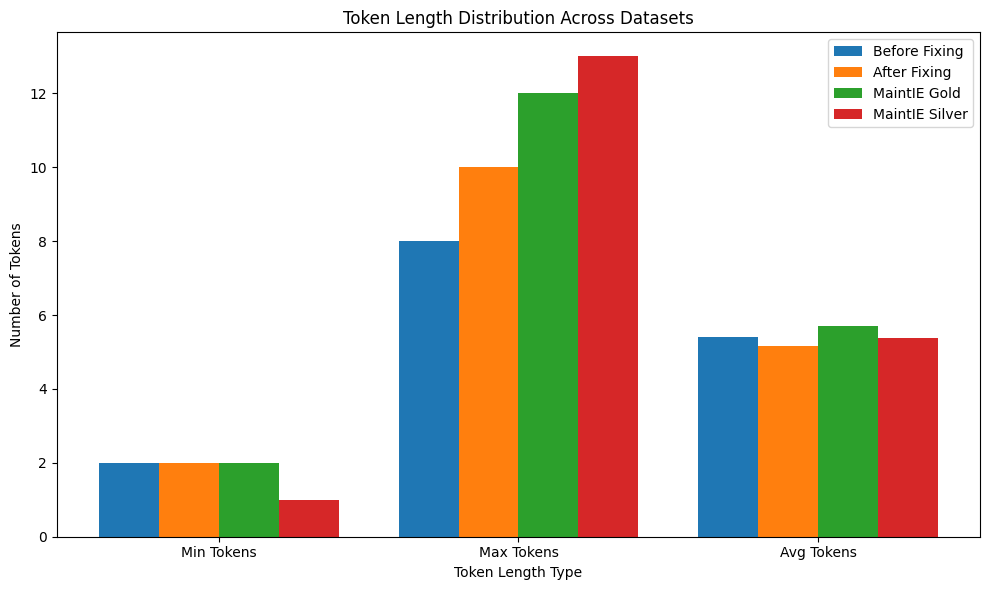

In [52]:
# Labels for the x-axis (min, max, avg)
labels = ['Min Tokens', 'Max Tokens', 'Avg Tokens']

# Set up the bar chart
x = np.arange(len(labels))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each dataset's values with an offset to group them
bars1 = ax.bar(x - 1.5*width, before_lengths, width, label='Before Fixing')
bars2 = ax.bar(x - 0.5*width, after_lengths, width, label='After Fixing')
bars3 = ax.bar(x + 0.5*width, gold_lengths, width, label='MaintIE Gold')
bars4 = ax.bar(x + 1.5*width, silver_lengths, width, label='MaintIE Silver')

# Add labels, title, and legend
ax.set_xlabel('Token Length Type')
ax.set_ylabel('Number of Tokens')
ax.set_title('Token Length Distribution Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()